In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['avocado.csv']


In [2]:
# Pull up the avocado

df = pd.read_csv('../input/avocado.csv')
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [3]:
# Let's check if there is missing.
# Thanksfully no missing avocado
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


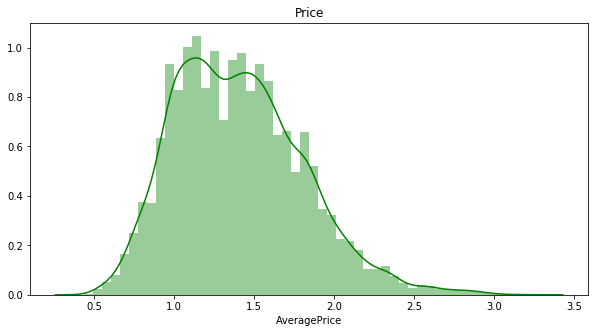

In [4]:

# Seems 1 ~ 2.5 is fair price for avocado
plt.figure(figsize=(10,5))
plt.title("Price")
ax = sns.distplot(df["AveragePrice"], color = 'green')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


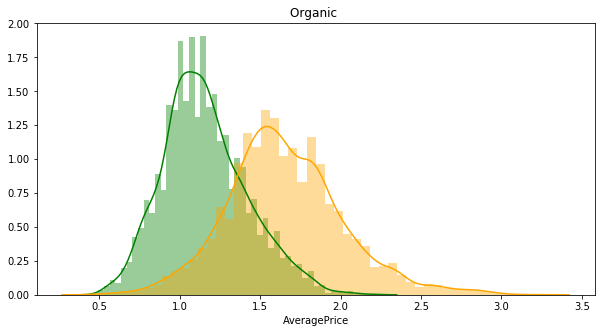

In [5]:
# Let's see the price by type...
# Definitely organic one is more expensive than regular.
# 1.5 ~ 2.0 is fair price for orgnaic avocado, which I can't afford sadly... :(
conventional = df[df['type'] =='conventional']
organic = df[df['type'] =='organic']

plt.figure(figsize=(10,5))
plt.title("Conventional Price")
ax = sns.distplot(conventional["AveragePrice"], color = 'green')
plt.title("Organic ")
ax = sns.distplot(organic["AveragePrice"], color = 'orange')


/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


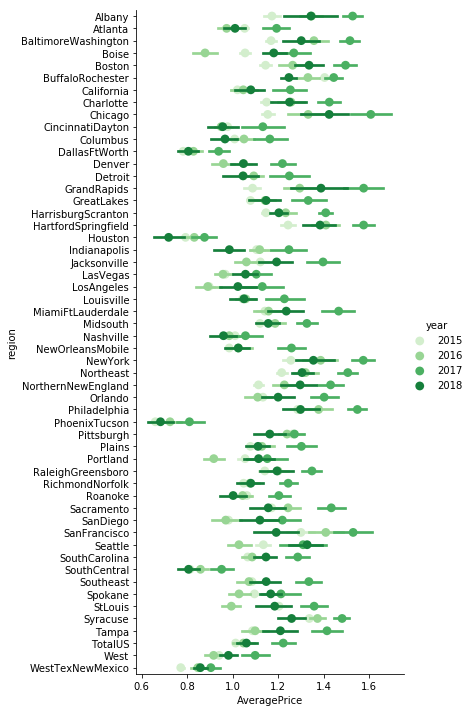

In [6]:
# Let's see the price range by region.
# Conventional avocado price by region
g = sns.factorplot('AveragePrice','region',data=conventional,
                   hue='year',size=10,aspect=0.6,palette='Greens',join=False)

In [ ]:
# Organic avocado price by region
# San Francisco is going fire! It's been almost 2.5, which was more than twice of regular avocado in 2017
g = sns.factorplot('AveragePrice','region',data=organic, hue='year',
                   size=10,aspect=0.6,palette='Oranges',join=False)

In [ ]:
# Next, let's see whcih variable affects price more.
# But before that, I gotta change some data types.

typemap = {'conventional' : 0 , 'organic' : 1}
df['type'] = df['type'].map(typemap)
df.sample(10)

In [ ]:


# I only put price,type,year,total volume, total bags on correlation analysis.
# Type definitely affects price most.

cols = ['AveragePrice','type','year','Total Volume','Total Bags']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.0)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, 
                 fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

In [7]:
# This code is very import to conduct fbprophet.
# For some reason, fbprophet is not working in Kaggle without the code below.
# Don't forget turning on internet on the kernel.

!pip3 uninstall --yes fbprophet
!pip3 install fbprophet --no-cache-dir --no-binary :all:

Uninstalling fbprophet-0.3.post2:
  Successfully uninstalled fbprophet-0.3.post2
    100% |████████████████████████████████| 51kB 3.5MB/s ta 0:00:011
    100% |████████████████████████████████| 81kB 10.9MB/s a 0:00:011
    100% |████████████████████████████████| 747kB 63.8MB/s ta 0:00:01
  Running setup.py install for lunardate ... done
  Running setup.py install for ephem ... done
  Running setup.py install for convertdate ... done
  Running setup.py install for holidays ... done
  Running setup.py install for setuptools-git ... done
  Running setup.py install for fbprophet ... done


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


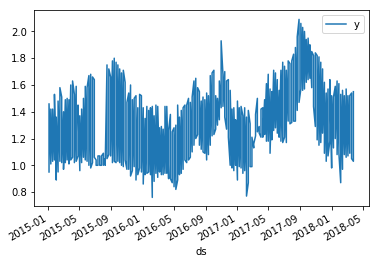

In [46]:
# Setting up the column names as ds and y.
# column name must be 'ds' and 'y'

from fbprophet import Prophet
df =df[df['region'] =='TotalUS']
df1 = df[['Date','AveragePrice']]
df1['Date'] = df1['Date'].astype('datetime64[ns]')
df1 = df1.rename(columns = {'Date':'ds','AveragePrice':'y'})
df1.plot(x='ds',y='y',kind='line')

# The graph is averace price trend.

In [52]:

# Create price forecast of avocado.
# I sat the period as 365, which means 1 year forecast.

m = Prophet()
m.fit(df1)

future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


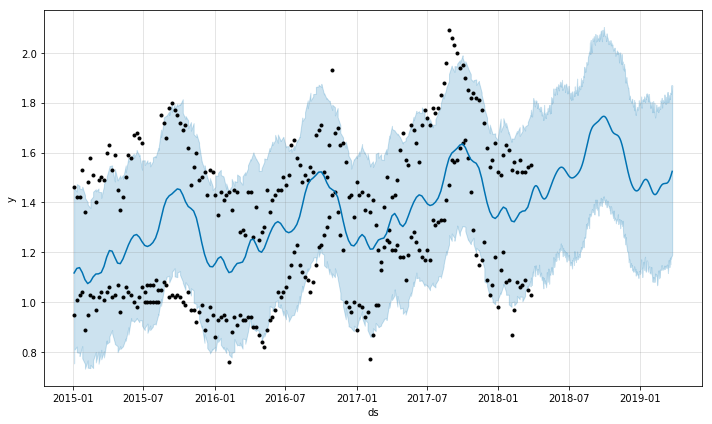

In [53]:

# the graph shows avocado price likely goes up.

fig1 = m.plot(forecast)

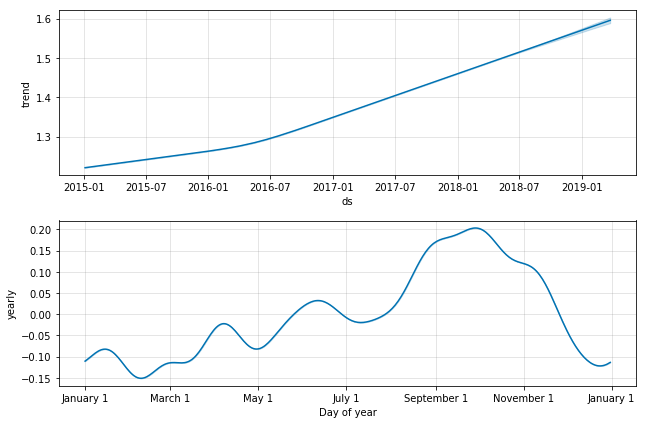

In [54]:
fig2 = m.plot_components(forecast)

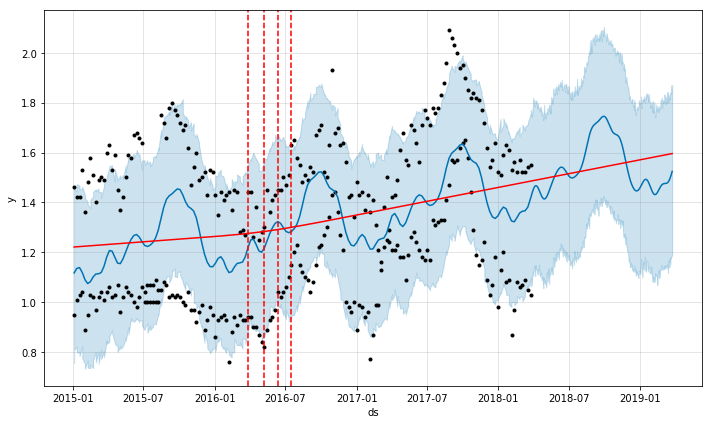

In [56]:
# Changepoints
# It doesn't really shows exact changepoints, so edit scale of changepoint 

from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


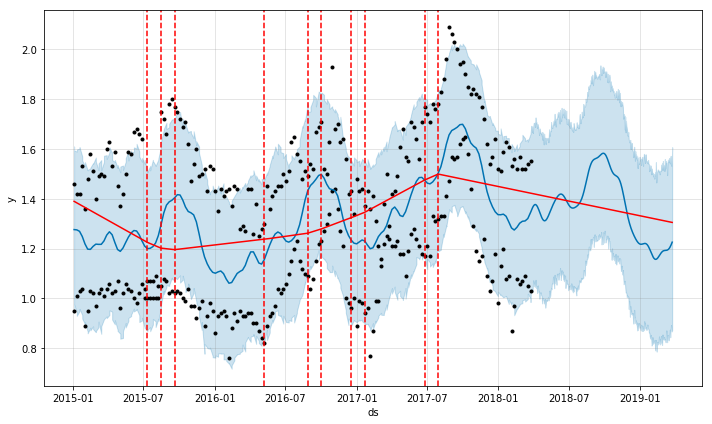

In [71]:
# looks much better. It closely shows changepoints

m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df1).predict(future)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


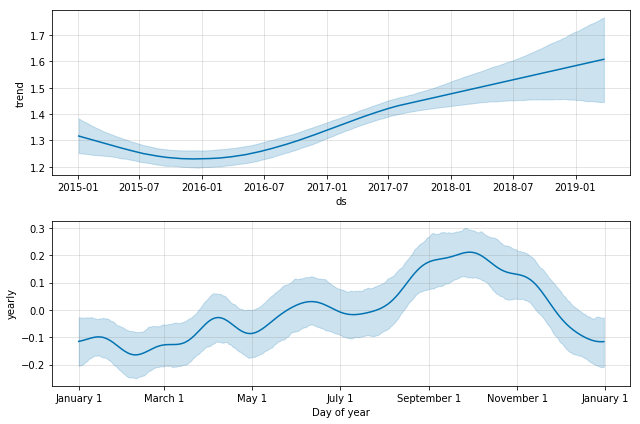

In [80]:
# Uncertainty in the Trend

forecast = Prophet(interval_width=0.95).fit(df1).predict(future)
m = Prophet(mcmc_samples=300)
forecast = m.fit(df1).predict(future)
fig = m.plot_components(forecast)

In [91]:

# Diagnostics

from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.tail()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2017-03-25 00:00:00 and 2017-03-25 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
101,2018-03-11,1.293100,0.840896,1.742644,1.52,2017-03-25
102,2018-03-18,1.322493,0.874344,1.732995,1.54,2017-03-25
103,2018-03-18,1.322493,0.903752,1.727459,1.05,2017-03-25
104,2018-03-25,1.358280,0.913572,1.778103,1.03,2017-03-25
105,2018-03-25,1.358280,0.934471,1.798783,1.55,2017-03-25


In [92]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()

,horizon,mse,rmse,mae,mape,coverage
101,351 days,0.060358,0.245679,0.242000,0.190125,1.0
102,358 days,0.055033,0.234590,0.232038,0.183920,1.0
103,358 days,0.055012,0.234546,0.232000,0.181740,1.0
104,365 days,0.062624,0.250247,0.247038,0.197140,1.0
105,365 days,0.059430,0.243782,0.240000,0.192265,1.0


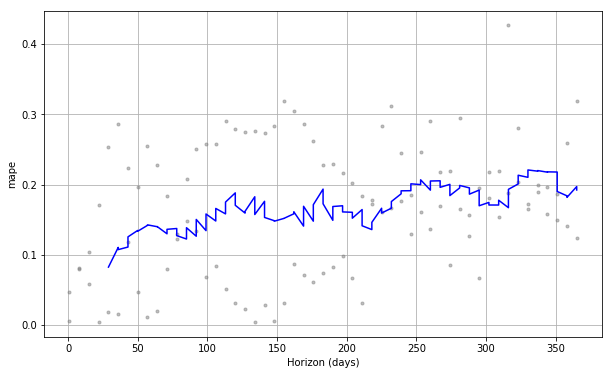

In [93]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [97]:
# So how much would recentavocado price be?
# Average price of avocado would be $1.60
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
698,2019-03-21,1.606825,1.116061,1.879421,1.445992,1.764242,-0.101653,-0.181419,-0.025417,-0.101653,-0.181419,-0.025417,0.0,0.0,0.0,1.505172
699,2019-03-22,1.607117,1.127841,1.877568,1.445868,1.764778,-0.096969,-0.175748,-0.022126,-0.096969,-0.175748,-0.022126,0.0,0.0,0.0,1.510148
700,2019-03-23,1.607410,1.141529,1.911356,1.445733,1.765531,-0.091968,-0.170053,-0.016287,-0.091968,-0.170053,-0.016287,0.0,0.0,0.0,1.515441
701,2019-03-24,1.607702,1.140480,1.910534,1.445610,1.766285,-0.086709,-0.166459,-0.009885,-0.086709,-0.166459,-0.009885,0.0,0.0,0.0,1.520993
702,2019-03-25,1.607994,1.142728,1.895540,1.445469,1.767039,-0.081260,-0.161321,-0.003161,-0.081260,-0.161321,-0.003161,0.0,0.0,0.0,1.526735
